# Data Set

In [35]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms as tt
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torchvision
import numpy as np


In [51]:
IMAGE_SIZE = 256
BATCH_SIZE = 1


class VisualWSDDataset(Dataset):
    def __init__(self, train, image_transform=None, text_transform=None, test_lang='en'):
        self.train = train
        self.image_transform = image_transform
        self.text_transform = text_transform

        self.base_path = './data/semeval-2023-task-1-V-WSD-train-v1/train_v1/'
        self.data_txt_path = self.base_path + 'train.data.v1.txt'
        self.gold_txt_path = self.base_path + 'train.gold.v1.txt'
        self.image_path = self.base_path + '/train_images_v1/'

        if not train:
            self.base_path = './data/'
            self.data_txt_path = self.base_path + test_lang + '.test.data.v1.1.txt'
            self.gold_txt_path = self.base_path + test_lang + '.test.gold.v1.1.txt'
            self.image_path = self.base_path + '/test_images_resized/'

            if test_lang == 'fa':
                self.data_txt_path = self.base_path + test_lang + '.test.data.txt'
                self.gold_txt_path = self.base_path + test_lang + '.test.gold.txt'
        

        # load txts
        self.data_df = pd.read_csv(self.data_txt_path, delimiter = "\t", header=None)
        self.gold_df = pd.read_csv(self.gold_txt_path, delimiter = "\t", header=None)
        self.data_gold_df  = pd.concat([self.data_df.iloc[:, 1], self.gold_df.iloc[:, 0]], axis=1, keys=['label', 'img_name'])

    def __len__(self):
        return len(self.data_gold_df)

    def __getitem__(self, idx):
        label = self.data_gold_df.iloc[idx]['label']
        image = Image.open(self.image_path + self.data_gold_df.iloc[idx]['img_name']).convert('RGB')

        if self.image_transform:
            image = self.image_transform(image)

        if self.text_transform:
            label = self.text_transform(label)


        return label, image

In [52]:
scale = tt.Resize((IMAGE_SIZE, IMAGE_SIZE))
tensor = tt.ToTensor()
image_composed = tt.transforms.Compose([scale, tensor])

In [56]:
train_set = VisualWSDDataset(train=True, image_transform=image_composed)
test_set = VisualWSDDataset(train=False, image_transform=image_composed, test_lang='it')

In [57]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

0 gomma per smacchiare torch.Size([3, 256, 256])


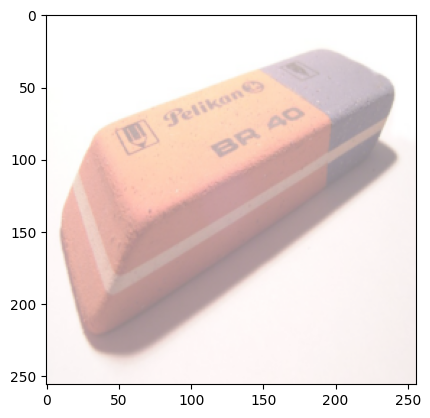

1 asino gioco di carte torch.Size([3, 256, 256])


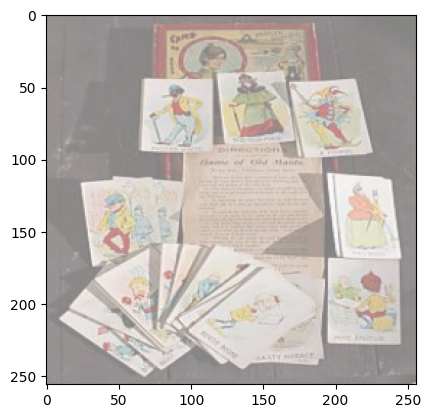

2 colonna missione torch.Size([3, 256, 256])


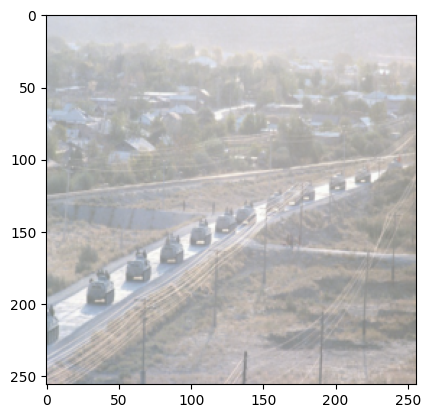

3 box per infanti torch.Size([3, 256, 256])


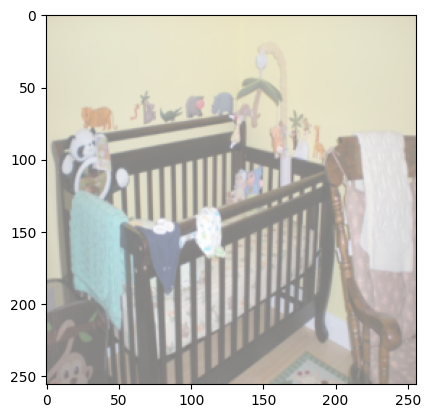

In [58]:
for i, sample in enumerate(test_set):
    print(i, sample[0], sample[1].size())
    imshow(sample[1])
    if i == 3:
        break